Importing the Dependencies

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pickle

Data Collection & Processing

In [65]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('data/calories.csv')

In [8]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [66]:
exercise_data = pd.read_csv('data/exercise.csv')

In [10]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [11]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [12]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [14]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [16]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

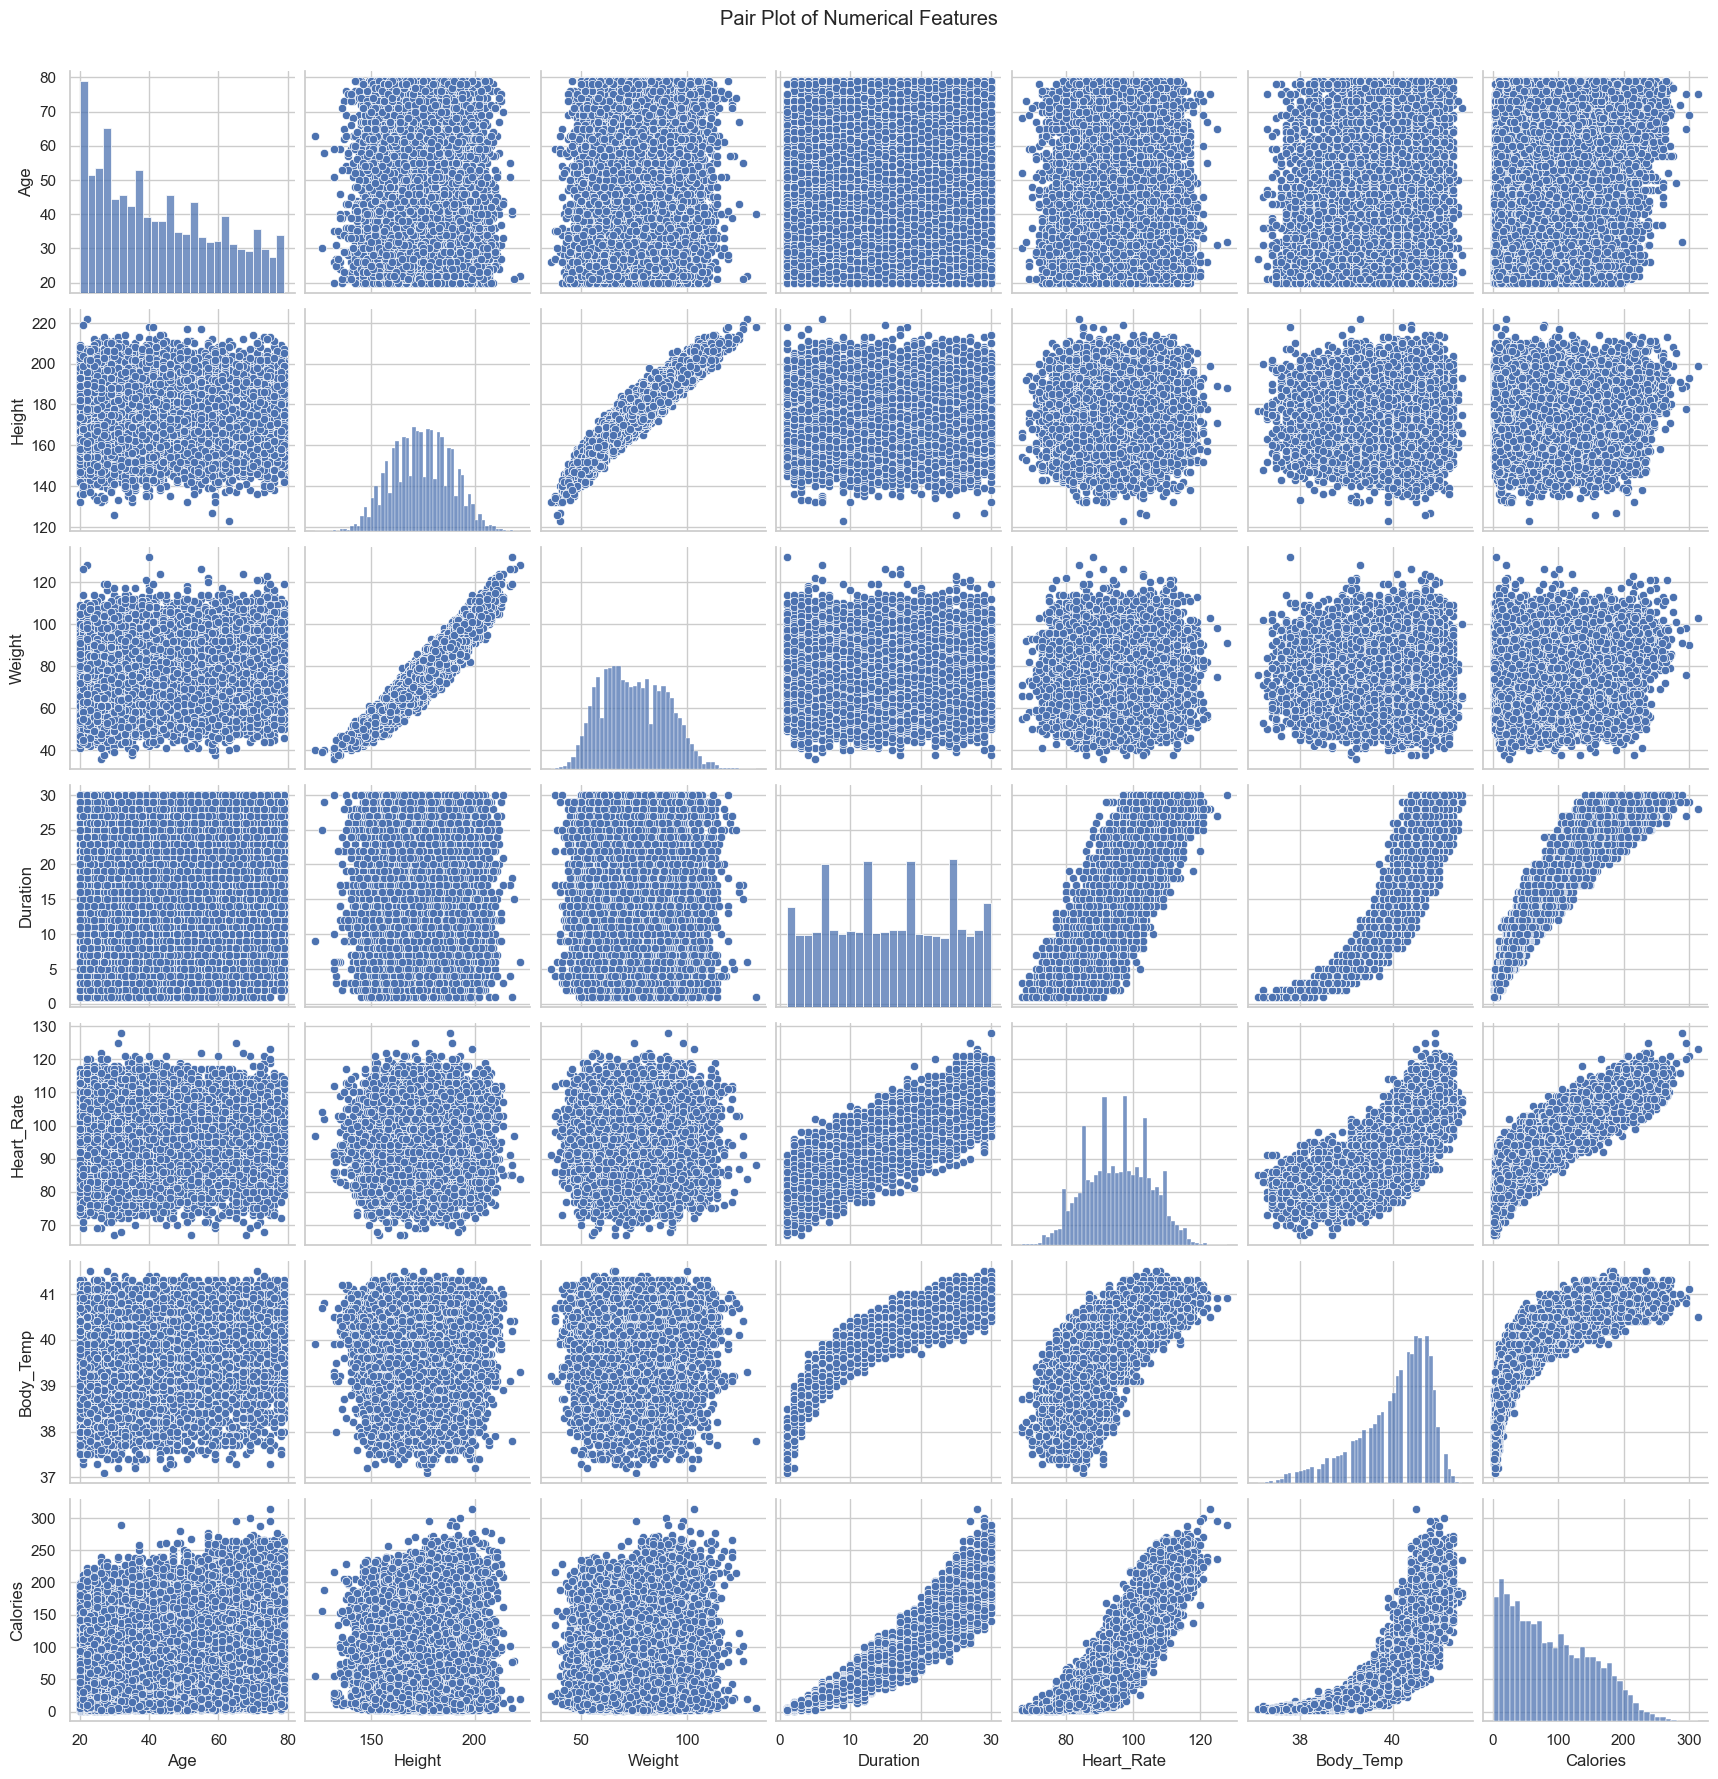

In [17]:
# Set the style for the plots
sns.set(style="whitegrid")

# Pair plot to visualize relationships between numerical features
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
sns.pairplot(data=calories_data[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

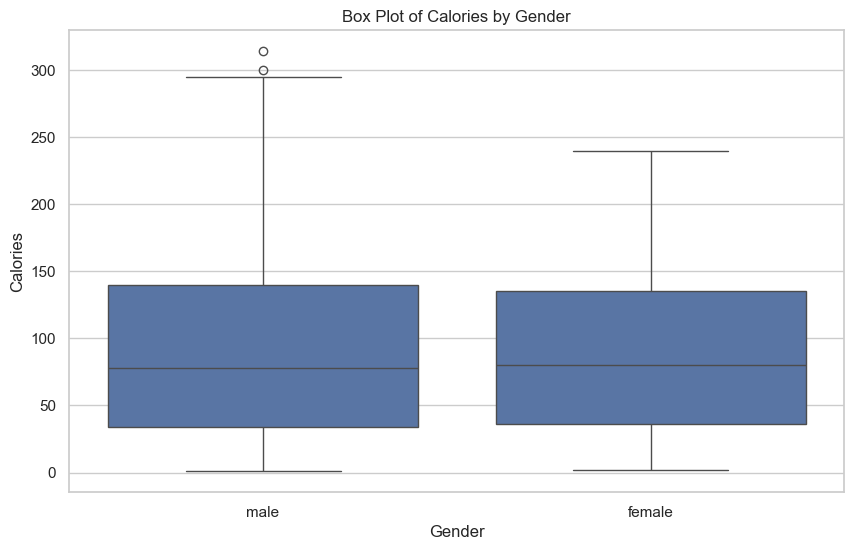

In [18]:
# Box plot for Gender vs. Calories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Calories', data=calories_data)
plt.title('Box Plot of Calories by Gender')
plt.show()


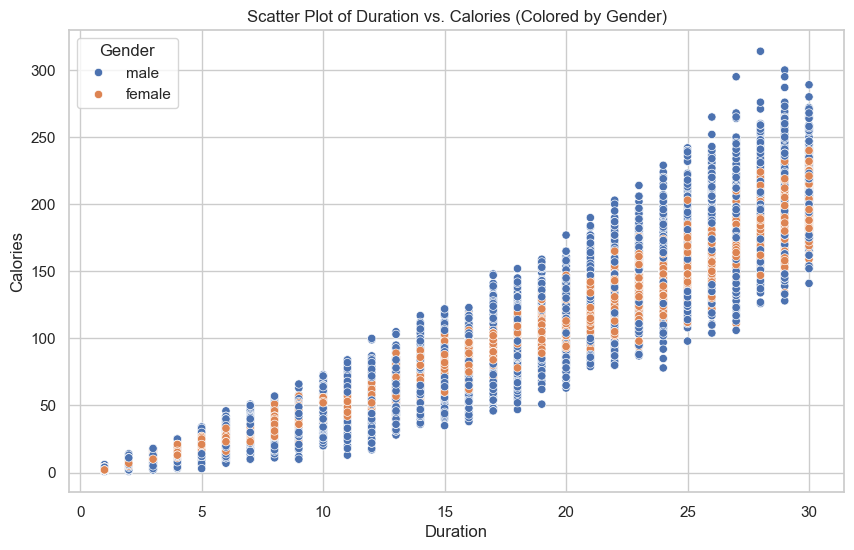

In [19]:
# Scatter plot for Duration vs. Calories colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Calories', hue='Gender', data=calories_data)
plt.title('Scatter Plot of Duration vs. Calories (Colored by Gender)')
plt.show()


In [20]:
sns.set()

C:\Users\Chetan\AppData\Local\Temp\ipykernel_11652\65959470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

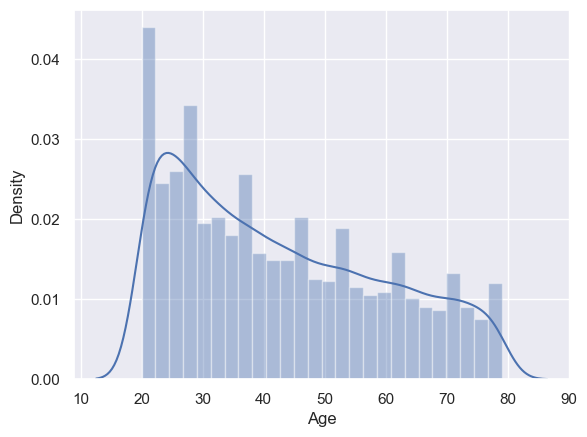

In [21]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

C:\Users\Chetan\AppData\Local\Temp\ipykernel_11652\784960979.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

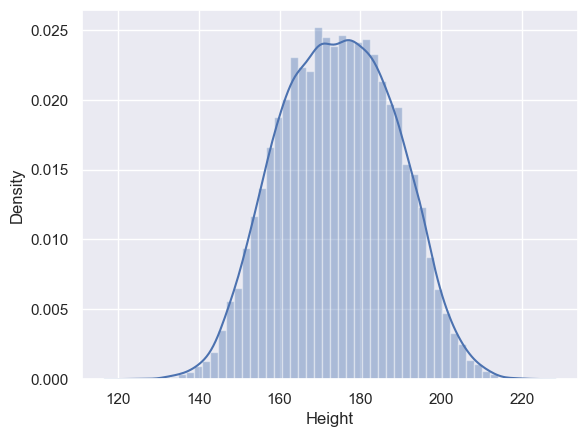

In [22]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

C:\Users\Chetan\AppData\Local\Temp\ipykernel_11652\1532561181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

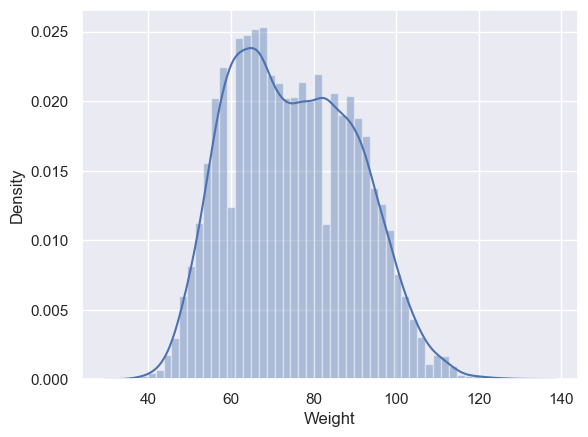

In [23]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [71]:
with open('models/LabelEncoder.pkl','wb') as f:
    pickle.dump(le,f)

In [26]:
calories_data['Gender']=le.fit_transform(calories_data['Gender'])
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [27]:
correlation = calories_data.corr()

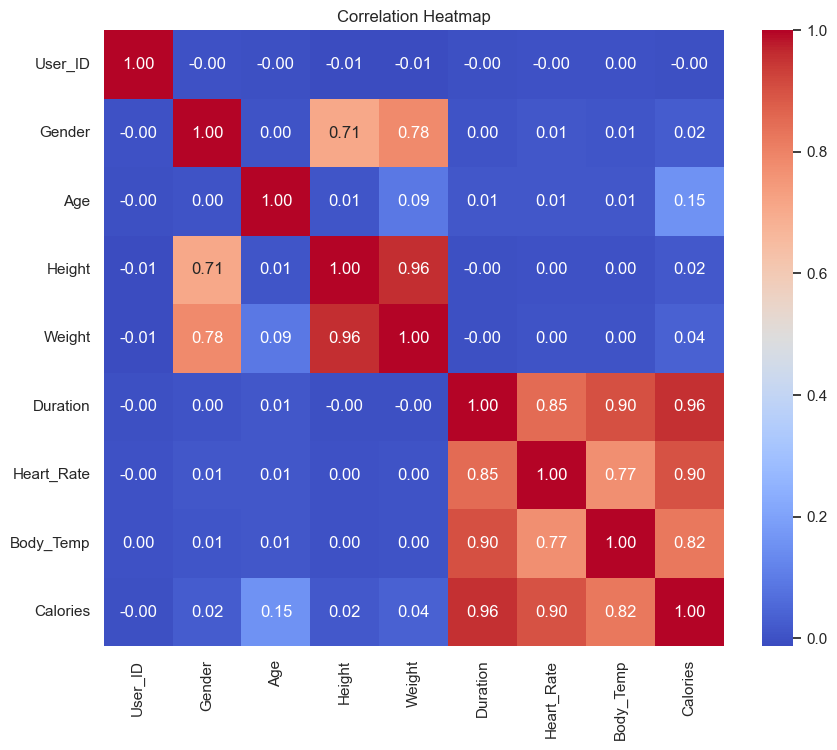

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Converting the text data to numerical values

In [29]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [30]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [31]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [32]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [35]:
# loading the model
model = XGBRegressor()

In [36]:
# training the model with X_train
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [60]:
filename = 'XGBoost_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [37]:
model1=LGBMRegressor()

In [38]:
model1.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 7
[LightGBM] [Info] Start training from score 89.586750


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [61]:
filename = 'LGBR_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model1, file)


In [39]:
model2=RandomForestRegressor()

In [40]:
model2.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
filename = 'RandomForest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model2, file)


In [41]:
model3=GradientBoostingRegressor()

In [42]:
model3.fit(X_train, Y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [63]:
filename = 'GBR_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model3, file)


Evaluation

Prediction on Test Data- XBGRegressor

In [43]:
test_data_prediction = model.predict(X_test)

In [44]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [45]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
rmse = metrics.root_mean_squared_error(Y_test, test_data_prediction)

In [46]:
print("Mean Absolute Error = ", mae)
print("rmse score = ", rmse)

Mean Absolute Error =  1.4833678883314132
rmse score =  2.1704170134933394


Prediction on Test Data- LGBMRegressor

In [47]:
test_data_prediction1 = model1.predict(X_test)

In [48]:
print(test_data_prediction1)

[126.92170477 223.05573423  37.00524008 ... 145.59814505  23.97140155
  87.60600446]


In [49]:
mae1 = metrics.mean_absolute_error(Y_test, test_data_prediction1)
rmse1 = metrics.root_mean_squared_error(Y_test, test_data_prediction1)

In [50]:
print("Mean Absolute Error = ", mae1)
print("rmse1 score = ", rmse1)

Mean Absolute Error =  1.2674715331714512
rmse1 score =  1.879764552271747


In [51]:
test_data_prediction2 = model2.predict(X_test)

In [52]:
print(test_data_prediction2)

[127.74 221.41  36.84 ... 146.18  23.8   89.21]


In [53]:
mae2 = metrics.mean_absolute_error(Y_test, test_data_prediction2)
rmse2 = metrics.root_mean_squared_error(Y_test, test_data_prediction2)

In [54]:
print("Mean Absolute Error = ", mae2)
print("rmse score = ", rmse2)

Mean Absolute Error =  1.6865633333333334
rmse score =  2.6493854444631744


In [55]:
test_data_prediction3 = model3.predict(X_test)

In [56]:
print(test_data_prediction3)

[127.1327758  226.19124002  38.36556999 ... 145.16622941  23.32577361
  92.28350552]


In [57]:
mae3 = metrics.mean_absolute_error(Y_test, test_data_prediction3)
rmse3= metrics.root_mean_squared_error(Y_test, test_data_prediction3)

In [58]:
print("Mean Absolute Error = ", mae3)
print("rmse = ", rmse3)

Mean Absolute Error =  2.778304266644558
rmse =  3.8170603358237285


In [67]:
Gradient_Boosting_Regressor = pickle.load(open('models/GBR_model.pkl', 'rb'))

In [81]:
Gradient_Boosting_Regressor.predict([X_test.iloc[0]])[0]

c:\Users\Chetan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


127.13277580246213

In [73]:
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
7592,0,41,172.0,74.0,24.0,98.0,40.8
3551,1,70,189.0,96.0,24.0,113.0,40.9
9698,0,53,173.0,68.0,7.0,96.0,39.3
3759,1,36,191.0,96.0,2.0,82.0,38.4
2353,0,46,169.0,68.0,20.0,111.0,40.6
...,...,...,...,...,...,...,...
8859,0,20,161.0,60.0,29.0,107.0,40.3
2886,0,40,152.0,49.0,11.0,87.0,39.8
14357,0,57,160.0,62.0,23.0,103.0,40.2
9430,0,58,171.0,67.0,6.0,82.0,39.4


In [79]:
Y_test

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64